# 載入套件

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist   #使用的資料集
import matplotlib.pyplot as plt     #資料視覺化
import pandas as pd  #矩陣運算
import numpy as np   #資料處理與結構

# 載入資料

In [ ]:
# Mnist Dataset    x:訓練集 y:測試集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#資料預處理 --> 正規化 (除以255，使之介於0-1)
x_train = X_train.reshape(60000, 28, 28, 1)/255 #圖片張數, 圖片大小n*n, 色彩(1:黑白 3:彩色)
x_test = X_test.reshape(10000, 28, 28, 1)/255  #圖片張數, 圖片大小n*n, 色彩(1:黑白 3:彩色)

#資料預處理 --> OneHot Encoding (將類別向量轉為二進位制)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

11501568/11490434 [==============================] - 0s 0us/step


OneHot Encoding

In [ ]:
Y_train.shape

(60000,)

In [ ]:
#OneHot Encoding前
Y_train[0]

5

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#OneHot Encoding後  (輸出結果以此方式表達label)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 建立LeNet-5模型

In [ ]:
model = Sequential()

#第一層：卷積層 (第一層才需寫輸入圖片大小)
#因為沒有設padding，所以輸出第一層的圖片大小降低為26*26
model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D())
#第二層：卷積層
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D())

#攤平
model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation='softmax')) #輸出10類(0-9)的手寫辨識 ; softmax:多分類

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# 訓練模型

In [ ]:
#評估標準:accuracy準確率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#epochs訓練次數:10次
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 [==============================] - 36s 21ms/step - loss: 0.6082 - accuracy: 0.8295
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0957 - accuracy: 0.9711
Epoch 3/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0667 - accuracy: 0.9802
Epoch 4/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 5/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0431 - accuracy: 0.9870
Epoch 6/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 7/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0316 - accuracy: 0.9898
Epoch 8/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 9/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 10/10
938/938 [==============================] - 22s 23ms/step - loss: 0.019

# 評估測試集

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test:')
print('Loss: %.3f \nAccuracy: %.3f' %(loss, accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.0340 - accuracy: 0.9895
Test:
Loss: 0.034 
Accuracy: 0.989


# 定義函式

In [ ]:
#繪製訓練集(traindata)或測試集(else)的label和圖片
def plot_img(num, traindata=True):
  if traindata:
    plt.imshow(X_train[num], cmap='gray')
    print('label: ', Y_train[num])
    plt.show()
  else:
    plt.imshow(X_test[num], cmap='gray')
    print('label: ', Y_test[num])
    plt.show()

#印出測試集的評估結果
def all_img_predict(model):
  #print(model.summary())
  #評估結果
  loss, accuracy = model.evaluate(x_test, y_test)
  print('Loss: %.3f' %loss)
  print('Accuracy: %.3f' %accuracy)
  #混淆矩陣
  predict = model.predict_classes(x_test)
  print(pd.crosstab(Y_test.reshape(-1), predict, rownames=['Label'], colnames=['predict']))

#印出對測試集 : 預測的label 與 實際的label 與 圖片
def one_img_predict(model, num):
  #預測的label
  predict = model.predict_classes(x_test)
  print('Prediction:', predict[num])
  #實際的lebel與圖片
  plot_img(num, traindata=False)
  print('---------------------------------')

In [ ]:
#訓練集第0筆
plot_img(0)
#測試集第0筆
plot_img(0, traindata=False)

In [ ]:
all_img_predict(model)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: 7
label:  7


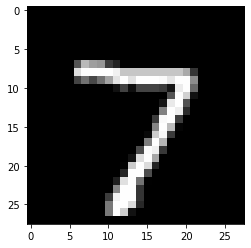

---------------------------------
Prediction: 2
label:  2


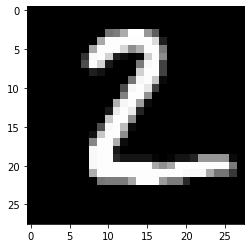

---------------------------------
Prediction: 1
label:  1


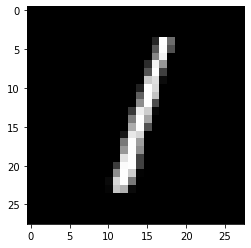

---------------------------------
Prediction: 0
label:  0


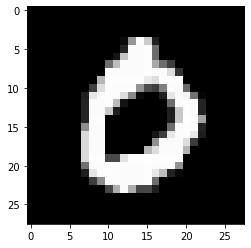

---------------------------------
Prediction: 4
label:  4


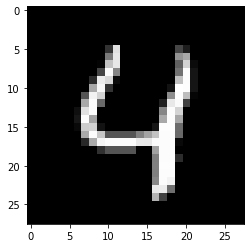

---------------------------------
Prediction: 1
label:  1


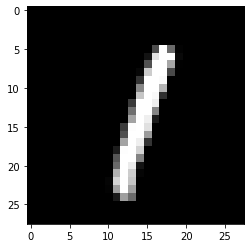

---------------------------------
Prediction: 4
label:  4


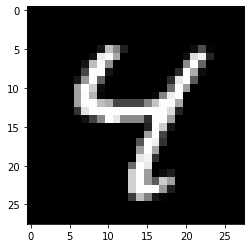

---------------------------------
Prediction: 9
label:  9


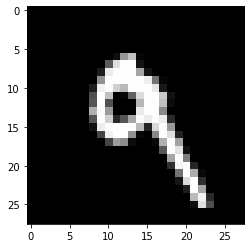

---------------------------------
Prediction: 6
label:  5


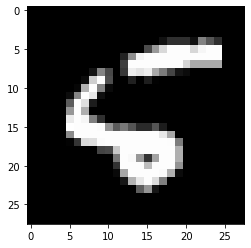

---------------------------------
Prediction: 9
label:  9


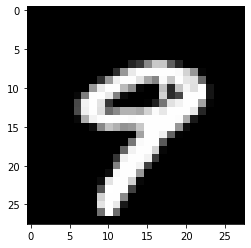

---------------------------------


In [ ]:
for i in range(10):
  one_img_predict(model, i)

# 錯分圖片

In [ ]:
predict = model.predict_classes(x_test)
predict.shape #列出矩陣有幾維(幾個數值)、陣列大小是多少

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000,)

In [ ]:
Y_test.shape #列出矩陣有幾維(幾個數值)、陣列大小是多少

(10000,)

In [ ]:
#輸出True時:預測正確(資料吻合) ; 輸出False時:預測錯誤(資料不吻合)
distinguish = (predict == Y_test)
distinguish

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
predict_error_index = []
for index in range(len(Y_test)):
  if ~distinguish[index]:        # ~ : true與false對調
    predict_error_index.append(index)  #把原false對調為true後輸出給predict_error_index 

In [ ]:
len(predict_error_index)

105

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: 6
label:  5


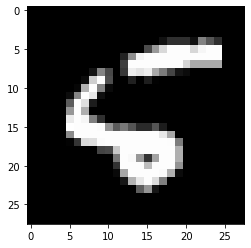

---------------------------------
Prediction: 9
label:  4


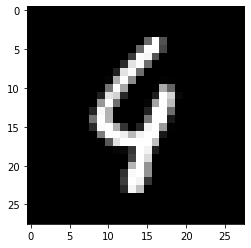

---------------------------------
Prediction: 7
label:  2


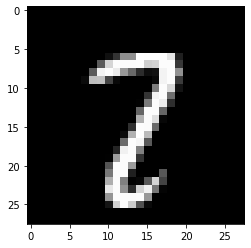

---------------------------------
Prediction: 3
label:  5


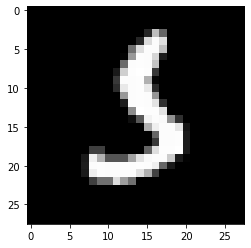

---------------------------------
Prediction: 8
label:  9


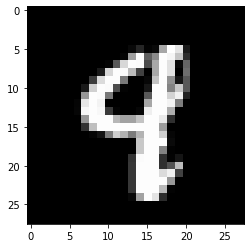

---------------------------------
Prediction: 8
label:  9


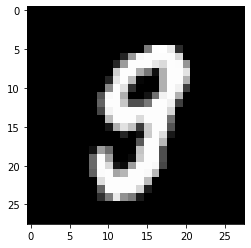

---------------------------------
Prediction: 5
label:  3


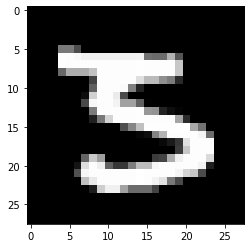

---------------------------------
Prediction: 2
label:  8


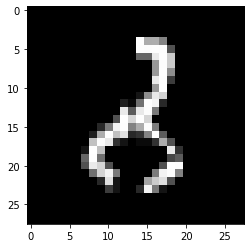

---------------------------------
Prediction: 7
label:  1


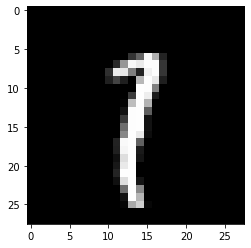

---------------------------------
Prediction: 8
label:  5


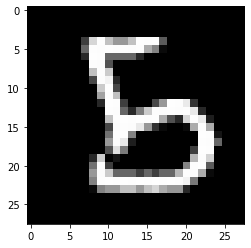

---------------------------------


In [ ]:
for num in predict_error_index[0:10]:
  one_img_predict(model, num)